In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../Data/f1_pitstops_2018_2024.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7374 entries, 0 to 7373
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Season                   7374 non-null   int64  
 1   Round                    7374 non-null   int64  
 2   Circuit                  7374 non-null   object 
 3   Driver                   7374 non-null   object 
 4   Constructor              7374 non-null   object 
 5   Laps                     7374 non-null   int64  
 6   Position                 7374 non-null   int64  
 7   TotalPitStops            7374 non-null   int64  
 8   AvgPitStopTime           7189 non-null   float64
 9   Race Name                7001 non-null   object 
 10  Date                     7001 non-null   object 
 11  Time_of_race             7001 non-null   object 
 12  Location                 7001 non-null   object 
 13  Country                  7001 non-null   object 
 14  Air_Temp_C              

In [21]:
# change date to datetime type
if df['Date'].dtype == 'object':
    df['Date'] = pd.to_datetime(df['Date'])
    print("'Date' column successfully converted to datetime")

# Remove 'Z' from 'Time_of_race' column
df['Time_of_race'] = df['Time_of_race'].str.replace('Z', '')

# Convert 'Time_of_race' to datetime objects
df['Time_of_race'] = pd.to_datetime(df['Time_of_race'], format='%H:%M:%S')

# Inspect missing values
missing = df.isnull().sum()
print('Missing values in each column:')
print(missing[missing > 0])


'Date' column successfully converted to datetime
Missing values in each column:
AvgPitStopTime              185
Race Name                   373
Date                        373
Time_of_race                373
Location                    373
Country                     373
Air_Temp_C                  373
Track_Temp_C                373
Humidity_%                  373
Wind_Speed_KMH              373
Lap Time Variation          185
Tire Usage Aggression        66
Fast Lap Attempts           185
Driver Aggression Score     185
Stint                       109
Tire Compound               109
Stint Length                109
Pit_Lap                    2810
Pit_Time                    281
dtype: int64


/var/folders/yd/yr14t01s34d7n1l0d3mtmnq80000gn/T/ipykernel_91221/174104469.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [22]:
# Drop rows with any missing values
df_cleaned = df.dropna()

# Verify the number of remaining rows and check for any remaining NaNs
print(f"Number of rows after dropping missing values: {len(df_cleaned)}")
print("\nMissing values after dropping:")
print(df_cleaned.isnull().sum())

Number of rows after dropping missing values: 4334

Missing values after dropping:
Season                     0
Round                      0
Circuit                    0
Driver                     0
Constructor                0
Laps                       0
Position                   0
TotalPitStops              0
AvgPitStopTime             0
Race Name                  0
Date                       0
Time_of_race               0
Location                   0
Country                    0
Air_Temp_C                 0
Track_Temp_C               0
Humidity_%                 0
Wind_Speed_KMH             0
Lap Time Variation         0
Total Pit Stops            0
Tire Usage Aggression      0
Fast Lap Attempts          0
Position Changes           0
Driver Aggression Score    0
Abbreviation               0
Stint                      0
Tire Compound              0
Stint Length               0
Pit_Lap                    0
Pit_Time                   0
dtype: int64


In [23]:
df['Time_of_race'].sample(10)

369    1900-01-01 13:10:00
6956   1900-01-01 13:00:00
3490   1900-01-01 19:00:00
5022   1900-01-01 05:00:00
2473   1900-01-01 14:10:00
5040   1900-01-01 05:00:00
6059   1900-01-01 06:00:00
3857   1900-01-01 05:00:00
2081   1900-01-01 13:10:00
4310   1900-01-01 13:00:00
Name: Time_of_race, dtype: datetime64[ns]

In [24]:
df['Pit_Time'].sample(10)

2590          21.84
536             NaN
2723         30.696
1445    Final Stint
7365         23.415
7235          15.79
6044         21.242
5305    Final Stint
762             NaN
7112          23.58
Name: Pit_Time, dtype: object

In [25]:
# convert Pit_Time to numeric
try:
    df['Pit_Time'] = pd.to_numeric(df['Pit_Time'], errors='coerce')

    non_numeric_pit_times = df[df['Pit_Time_Seconds'].isna()]['Pit_Time'].unique()
    if len(non_numeric_pit_times) > 0:
        print("\nNon-numeric values found in 'Pit_Time':")
        print(non_numeric_pit_times)
    else:
        print("\nNo non-numeric values found in 'Pit_Time' after conversion.")
except Exception as e:
    print(f"An error occurred while converting: {e}")

An error occurred while converting: 'Pit_Time_Seconds'


In [26]:
df['Pit_Time'].sample(10)

579         NaN
775      22.660
6561     23.762
5874        NaN
1136        NaN
4676    401.749
3117        NaN
6341        NaN
3483        NaN
6263     46.969
Name: Pit_Time, dtype: float64

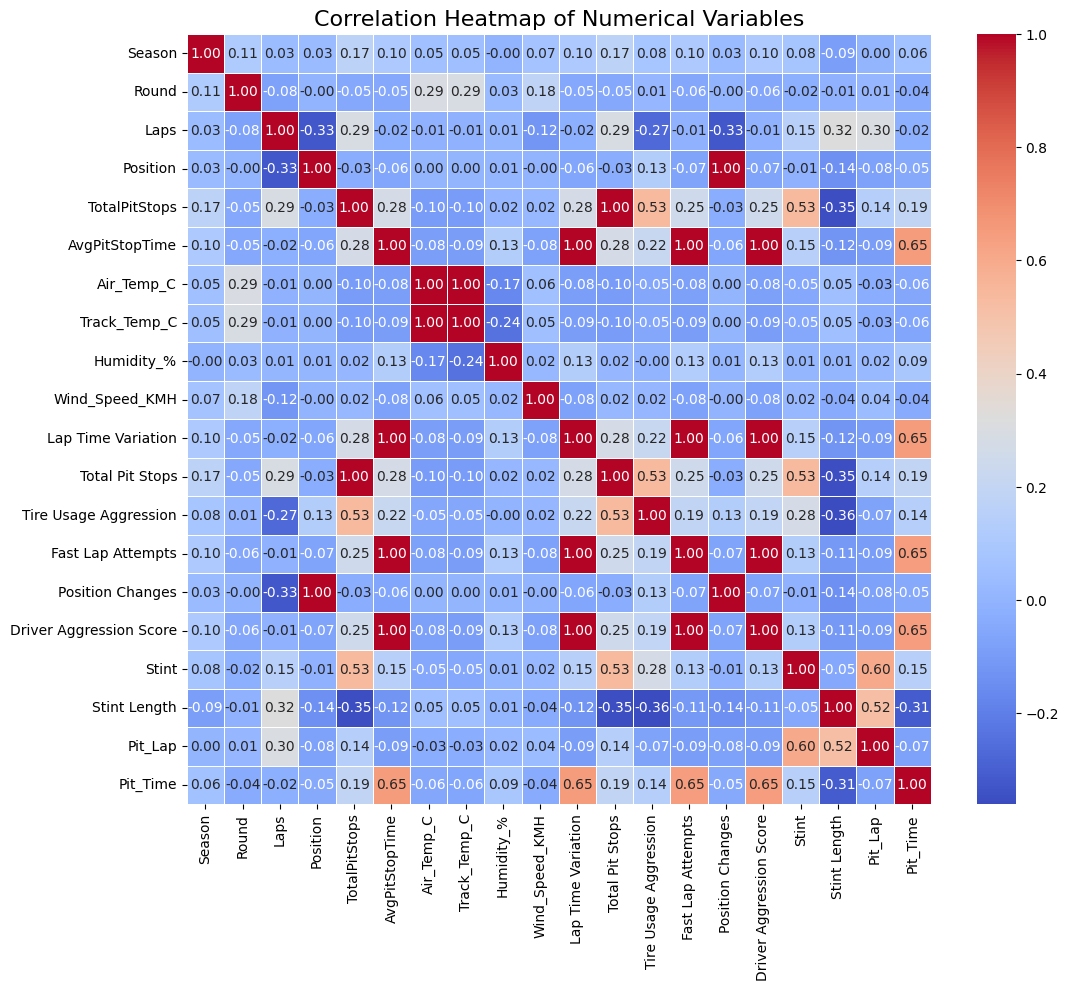

In [32]:
# check correlation
numerical_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.show()

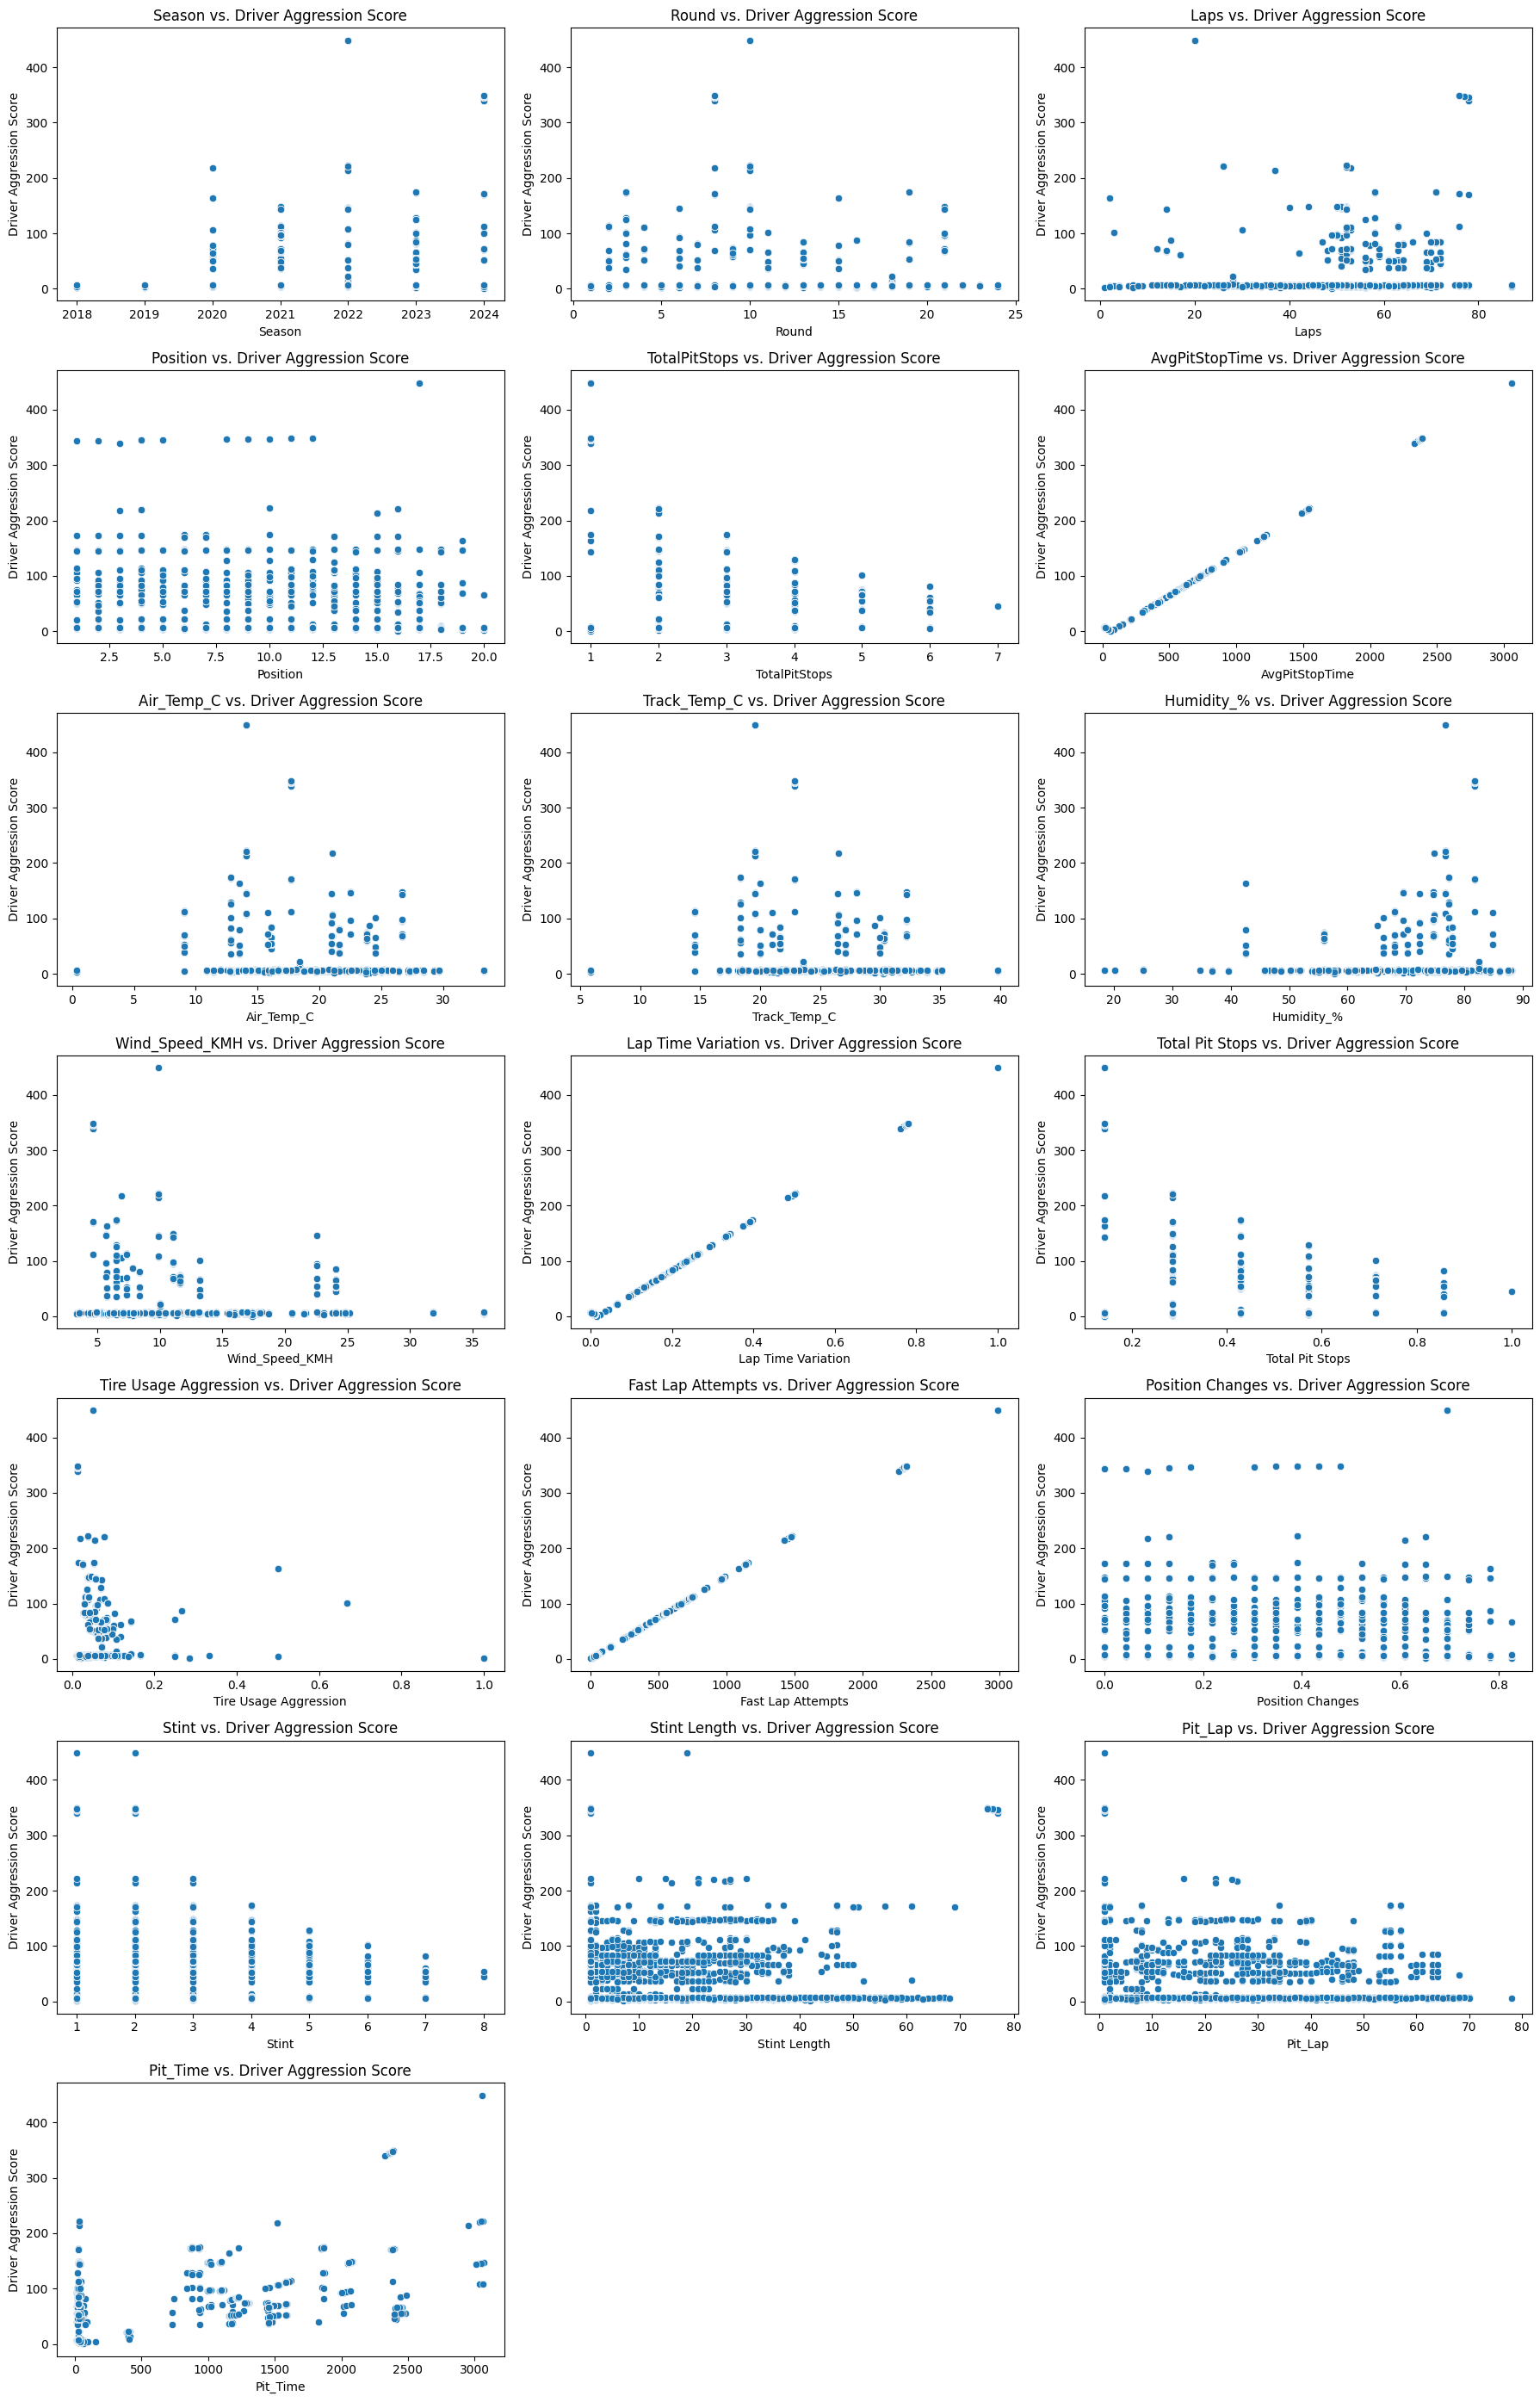

In [41]:
# Select all numerical columns from the cleaned DataFrame
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

if 'Driver Aggression Score' in numerical_cols:
    numerical_cols.remove('Driver Aggression Score')

# Create scatter plots
num_plots = len(numerical_cols)
rows = (num_plots + 2) // 3  
cols = min(num_plots, 3)

plt.figure(figsize=(6 * cols, 4 * rows))
for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols, i + 1)
    sns.scatterplot(x=df[col], y=df['Driver Aggression Score'])
    plt.title(f'{col} vs. Driver Aggression Score')
    plt.xlabel(col)
    plt.ylabel('Driver Aggression Score')
plt.tight_layout()
plt.show()

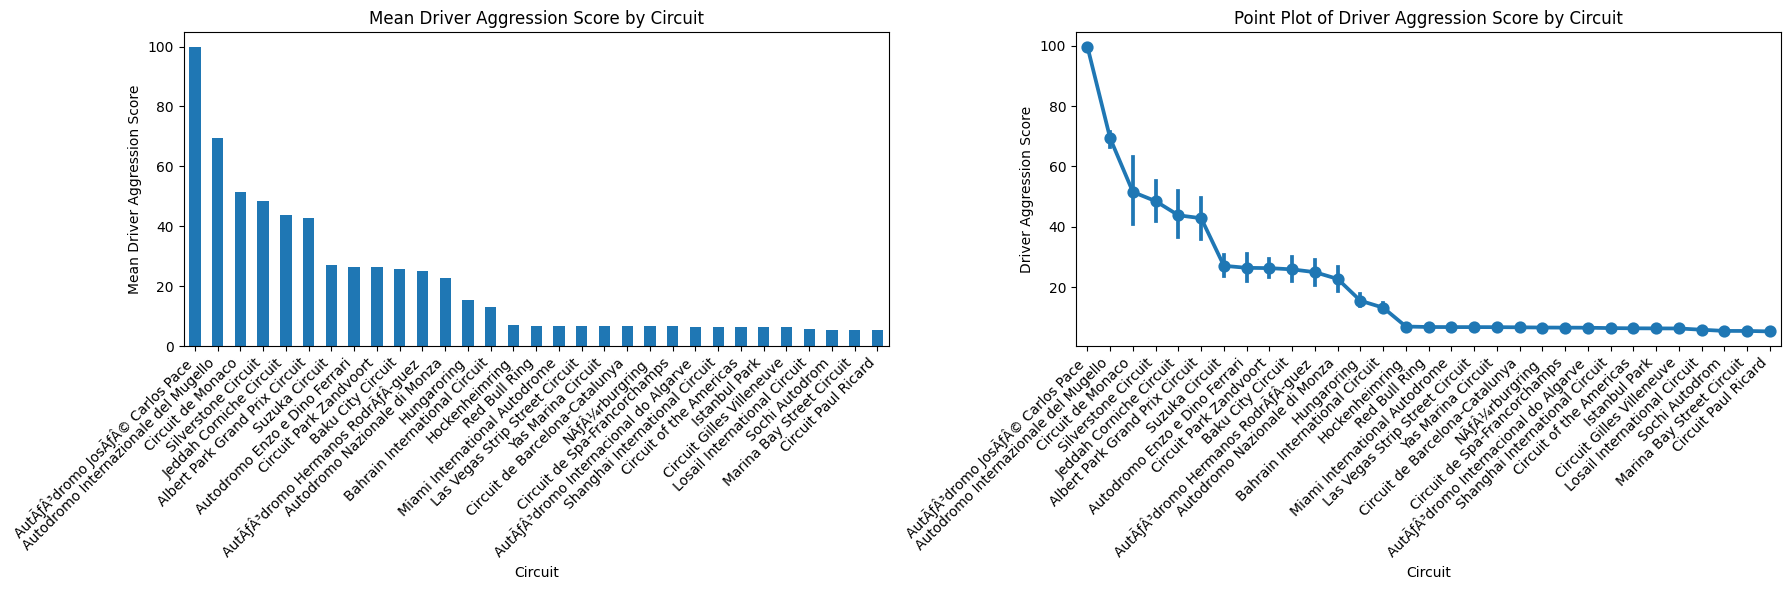

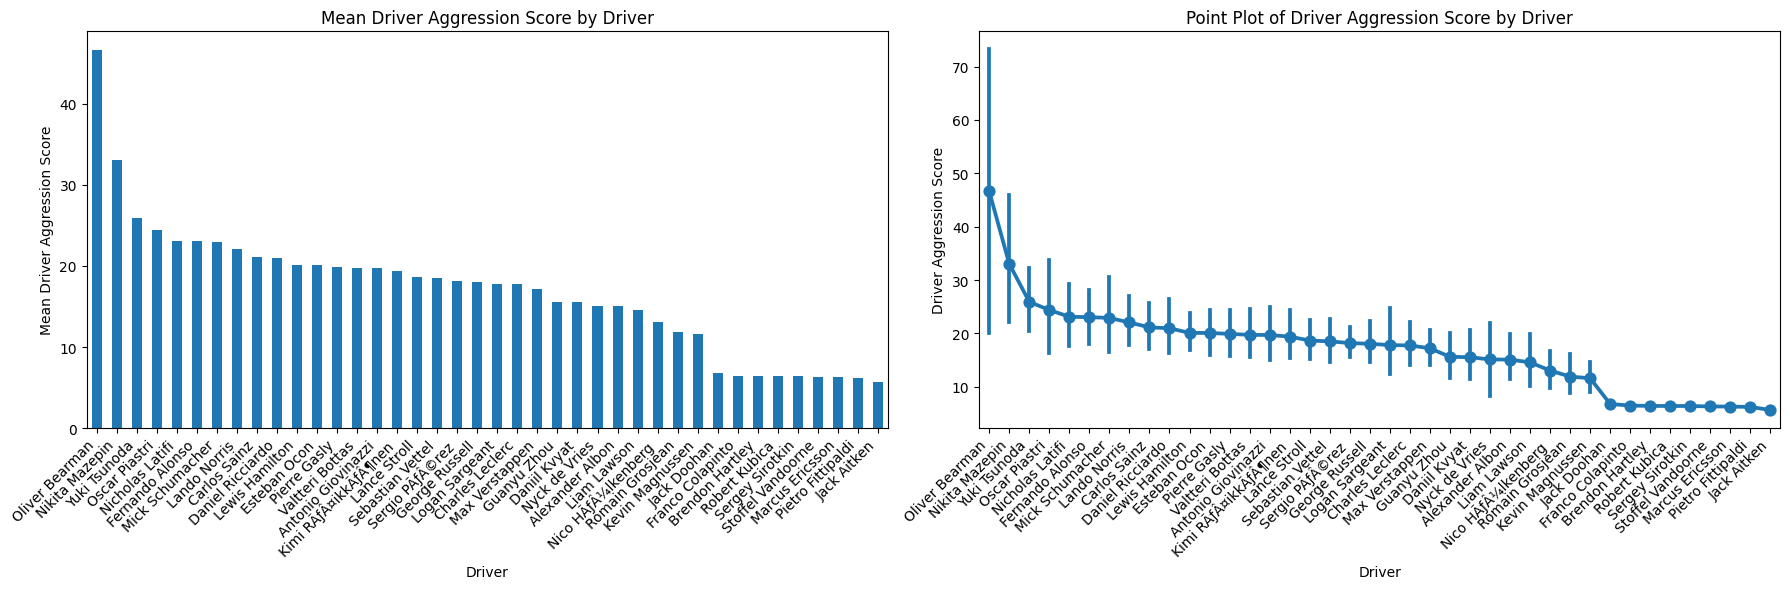

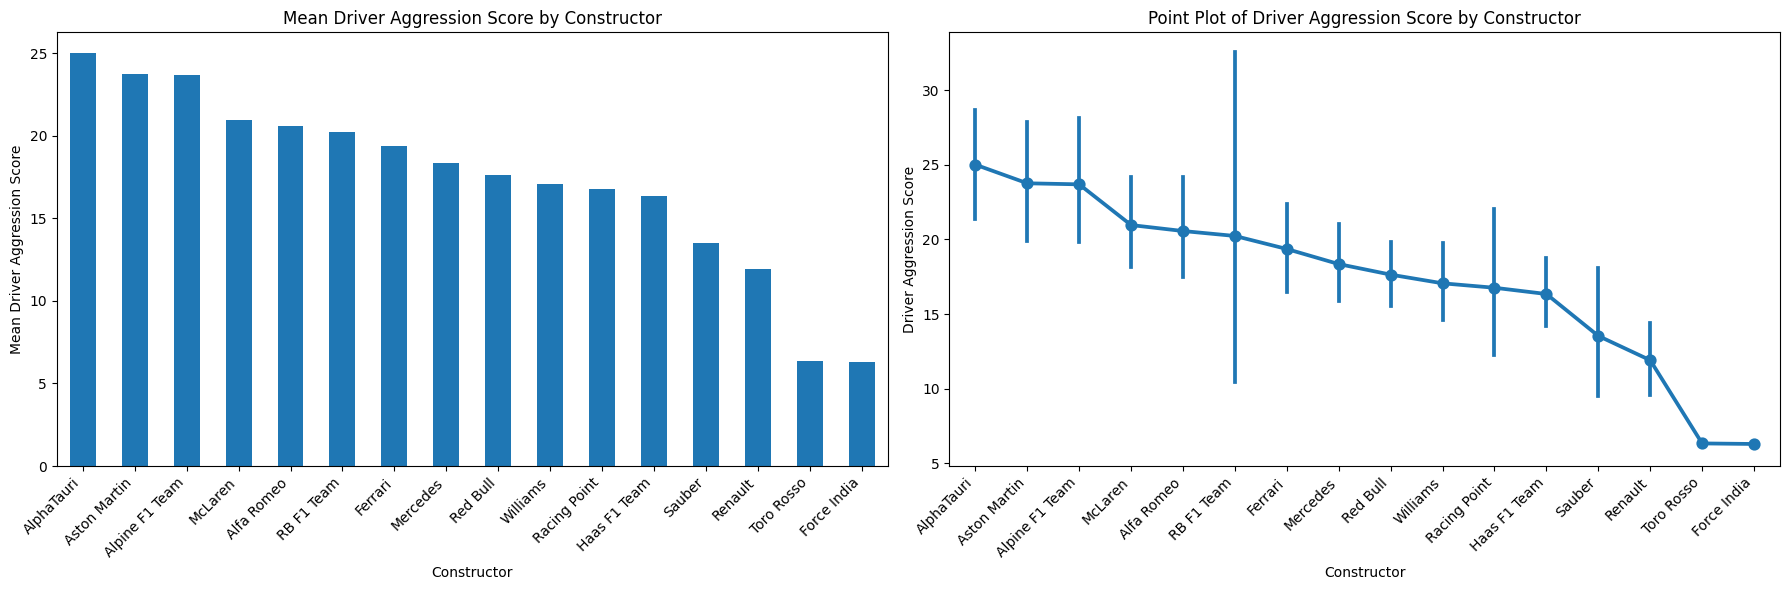

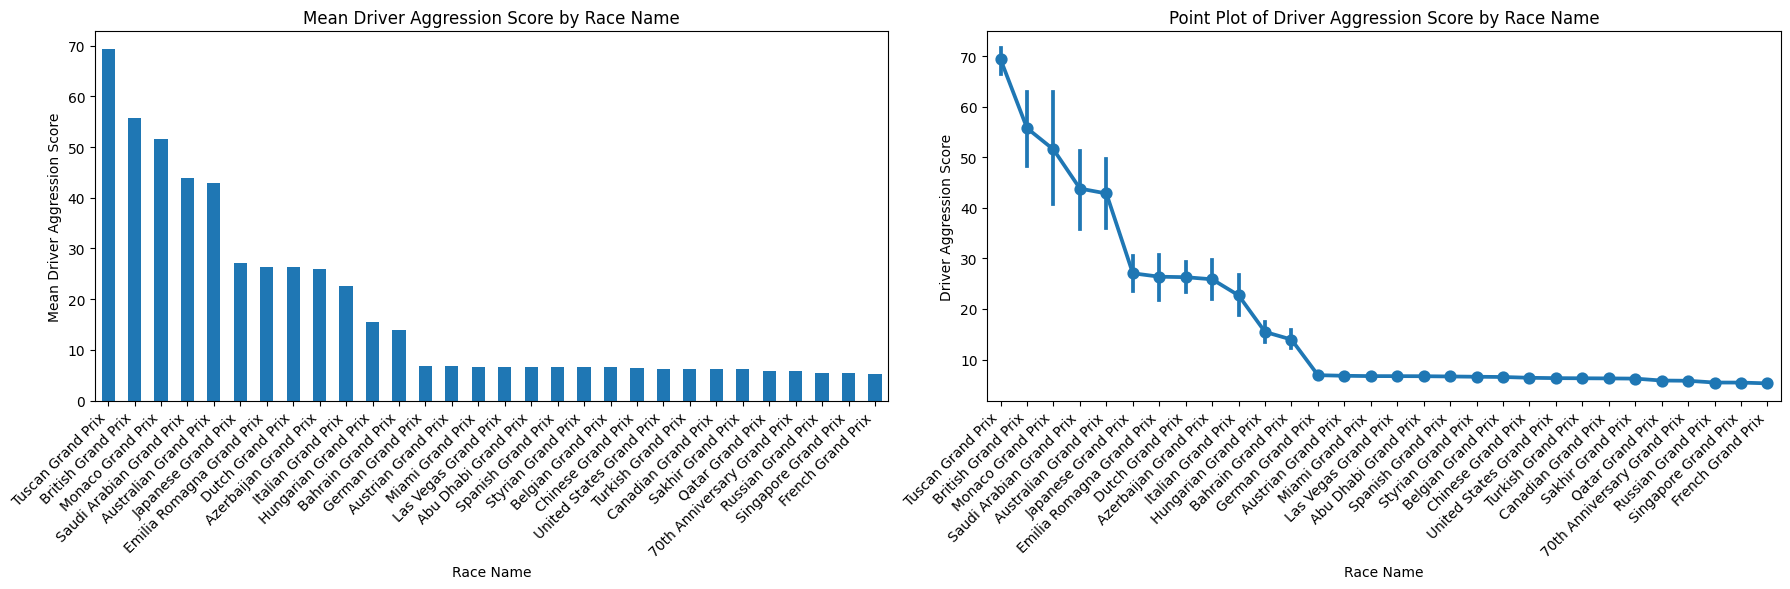

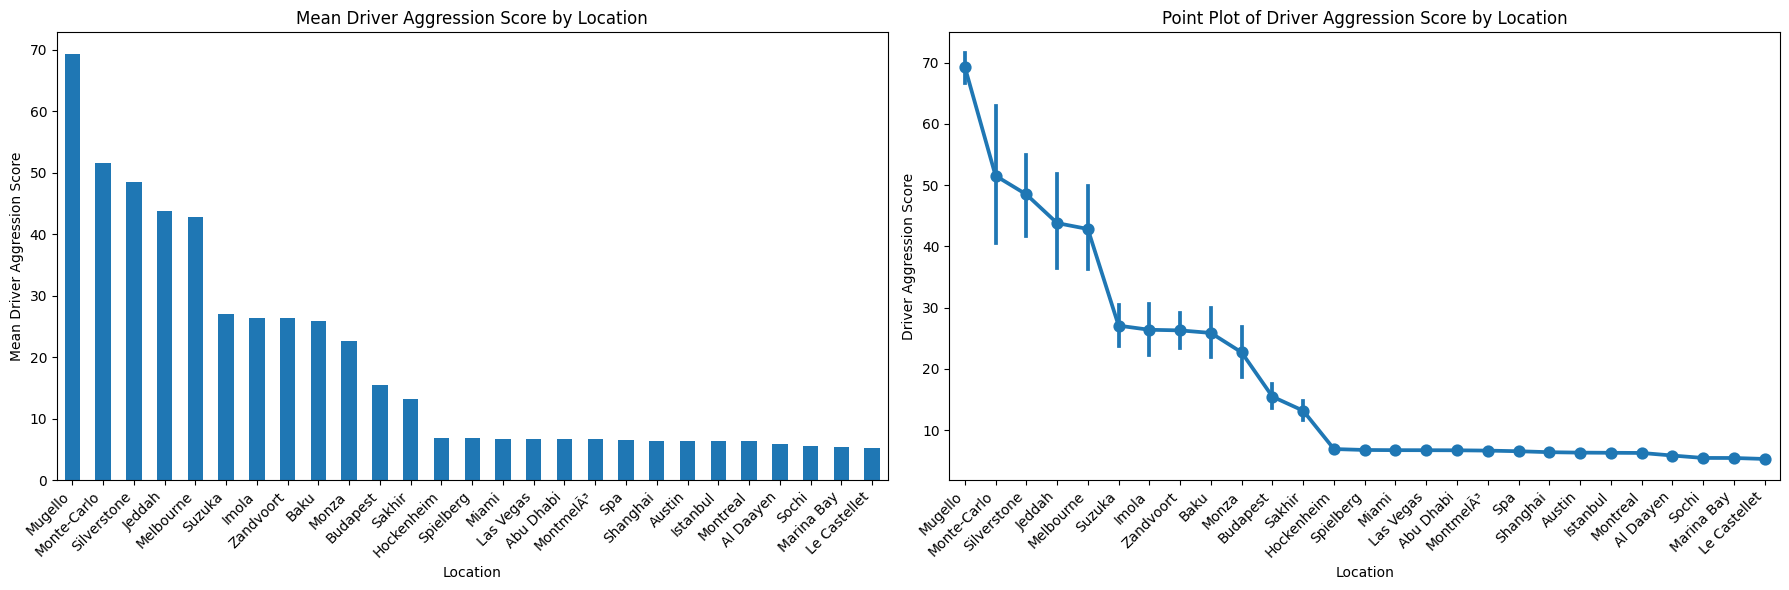

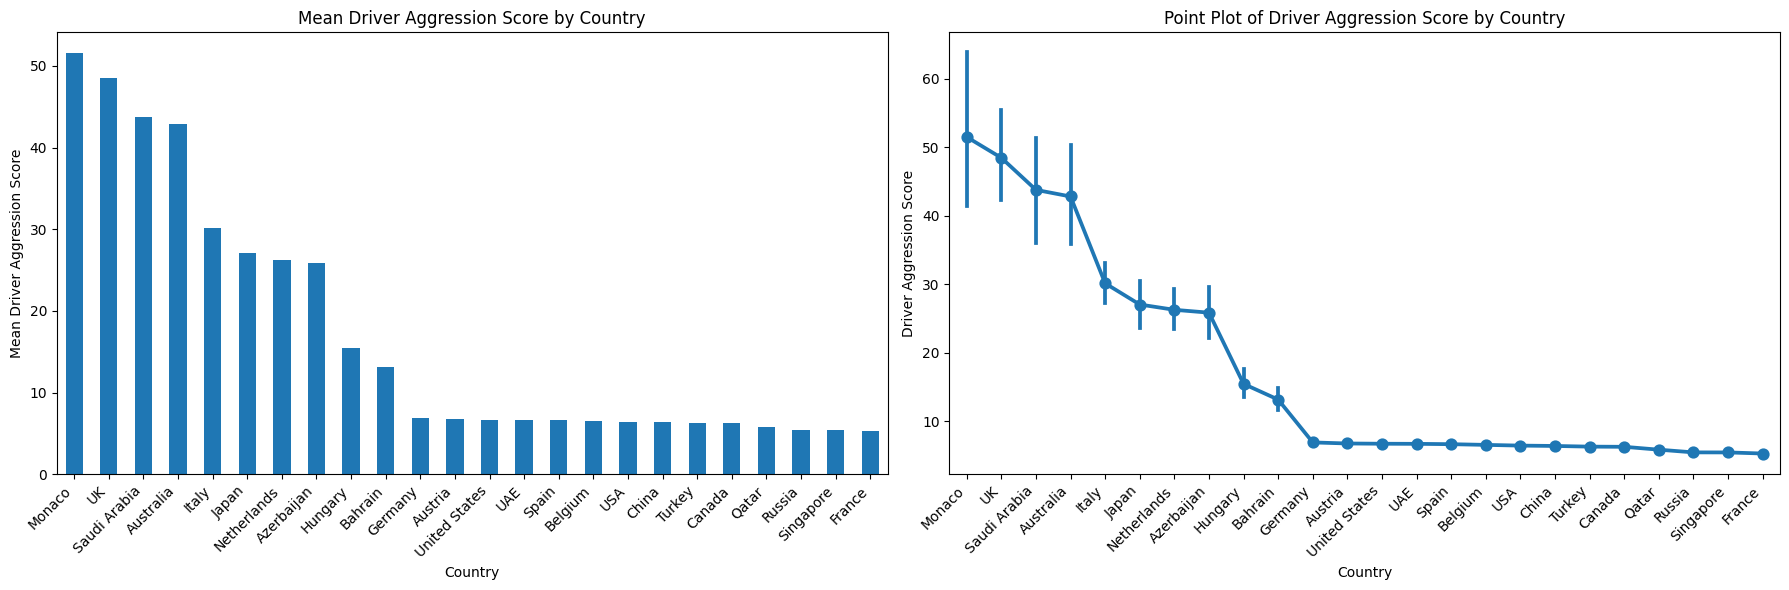

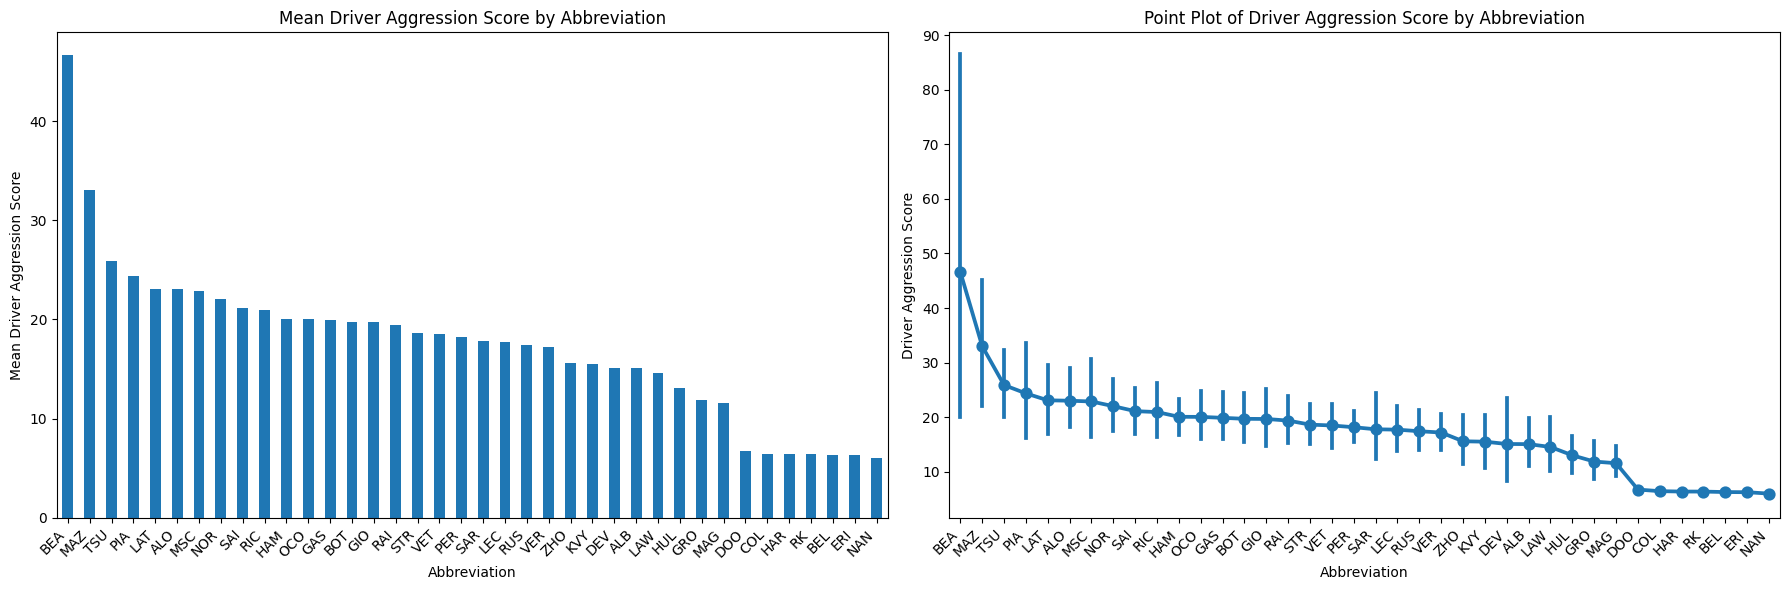

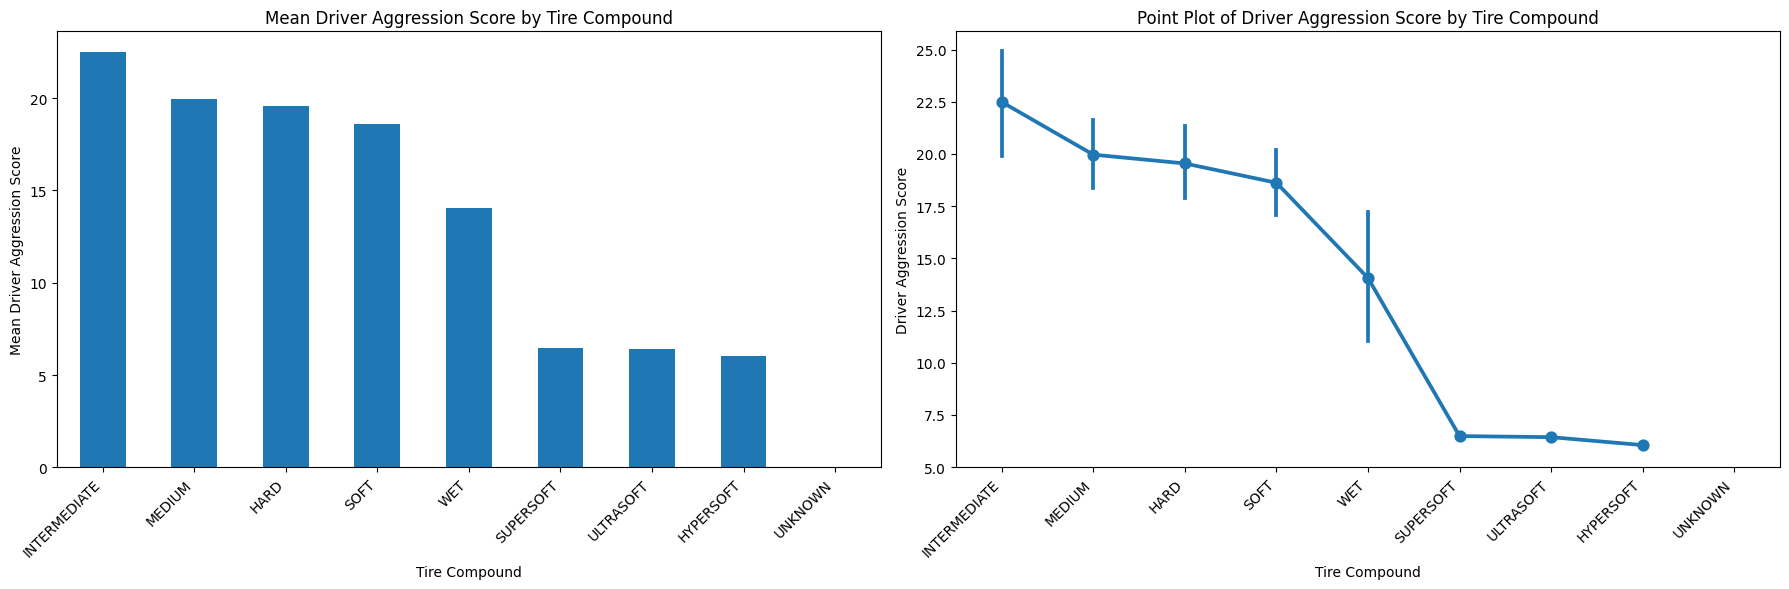

In [42]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    # Calculate the mean Driver Aggression Score for sorting
    mean_aggression = df.groupby(col)['Driver Aggression Score'].mean().sort_values(ascending=False)

    plt.figure(figsize=(18, 6))  # Adjust figure size for two subplots

    # Left subplot: Bar plot of mean
    plt.subplot(1, 2, 1)
    mean_aggression.plot(kind='bar')
    plt.title(f'Mean Driver Aggression Score by {col}')
    plt.xlabel(col)
    plt.ylabel('Mean Driver Aggression Score')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Right subplot: Point plot with confidence intervals
    plt.subplot(1, 2, 2)
    sns.pointplot(x=col, y='Driver Aggression Score', data=df, order=mean_aggression.index)
    plt.title(f'Point Plot of Driver Aggression Score by {col}')
    plt.xlabel(col)
    plt.ylabel('Driver Aggression Score')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.show()

In [43]:
# migrate new processed data
try:
    print("writing processed data to csv...")
    df.to_csv("../Data/cleaned_pitstop_data")
    print("successfully export processed data")
except Exception as e:
    print(f"Error occurred: {e}")

writing processed data to csv...
successfully export processed data
